# The Curse of Dimensionality

[Wikipedia] The curse of dimensionality (Bellman, 1961) refers to various phenomena that arise when analyzing and organizing data in high dimensional spaces (often with hundreds or thousands of dimensions) that do not occur in low-dimensional settings such as the three-dimensional physical space of everyday experience.

### Volume in Hyperspace

Considere a hypercube with sides $l$. We wish to compute volume occupied by a small margin as shown in the following figure:

<img src="imgs/square_margin.png" width=350/>

In two dimensions, the _volume_ of the margin is

$$V_M = l^2 - (0.9 l)^2 = l^2 (1 - 0.9^2) = 0.19 l^2$$

In three dimension, the volume of the margin becomes

$$V_M = l^3 - (0.9 l)^3 = l^3 (1 - 0.9^3)= 0.27 l^3$$

For the general case, as the dimensionality $d$ increases, the volume of the margin becomes:

$$V_M = l^d (1 - 0.9^d) \approx l^d$$

For example, at $d=50$, $99\%$ of the total volume is occupied by the margin!

### 1-d case

In [20]:
# prep material
import matplotlib.pyplot as plt
%matplotlib inline

In [21]:
# set the dimension and edge length
d = 1
edge_len = 1
margin_ratio = .1

cube_volume = edge_len ** d

inner_cube_edge_len = edge_len * (1 - margin_ratio)
inner_cube_volume = inner_cube_edge_len ** d

margin_volume_ratio = (cube_volume - inner_cube_volume) / cube_volume

print "When dimension = {:d} and the margins are {:.2f}% of the total edge length:".format(d, margin_ratio * 100)
print "\t Total volume = {:d}".format(cube_volume)
print "\t Hole volume  = {:.5f}".format(inner_cube_volume)
print "\t So as a ratio,",
print "{:.2f}% of the volume is in the margins.\n".format(100 * margin_volume_ratio)

When dimension = 1 and the margins are 10.00% of the total edge length:
	 Total volume = 1
	 Hole volume  = 0.90000
	 So as a ratio, 10.00% of the volume is in the margins.



### Generalized to d > 1
Lets build a custom function to do this for arbitrary of dimensions:

In [22]:
def hyper_margin_ratio(d = 1, edge_len = 1, margin_ratio = .1):
    ''' Calculates (volume of hypermargin) / (volume of outer hypercube)
        
        d = dimension of the hyperspace
        edge_len = edge length of the hypercube
        margin_ratio = fraction of edge_len that will be in margin, 
                       ie. margin length = margin_ratio * edge_len
        
    '''
    cube_volume = edge_len ** d

    inner_cube_edge_len = edge_len * (1 - margin_ratio)
    inner_cube_volume = inner_cube_edge_len ** d

    margin_volume_ratio = (cube_volume - inner_cube_volume) / cube_volume
    
    print "When dimension = {:d} and the margins are {:.2f}% of the total edge length:".format(d, margin_ratio * 100)
    print "\t Total volume = {:d}".format(cube_volume)
    print "\t Hole volume  = {:.5f}".format(inner_cube_volume)
    print "\t So as a ratio,",
    print "{:.2f}% of the volume is in the margins.\n".format(100 * margin_volume_ratio)

    return margin_volume_ratio

### 2-dim case

In [23]:
d2 = hyper_margin_ratio(d = 2)

When dimension = 2 and the margins are 10.00% of the total edge length:
	 Total volume = 1
	 Hole volume  = 0.81000
	 So as a ratio, 19.00% of the volume is in the margins.



### n-dim case

So for the 2 dimension case, we see that around 19% is in the margins.
Now lets loop through n = 1,2,3,... to see how this ratio increases with dimension number:

In [24]:
max_d = 50
margin_ratio = .05
dimensions = range(1, max_d + 1)

margin_ratios = [
    round(hyper_margin_ratio(d, margin_ratio = margin_ratio), 2) 
    for d in dimensions
]

print margin_ratios

When dimension = 1 and the margins are 5.00% of the total edge length:
	 Total volume = 1
	 Hole volume  = 0.95000
	 So as a ratio, 5.00% of the volume is in the margins.

When dimension = 2 and the margins are 5.00% of the total edge length:
	 Total volume = 1
	 Hole volume  = 0.90250
	 So as a ratio, 9.75% of the volume is in the margins.

When dimension = 3 and the margins are 5.00% of the total edge length:
	 Total volume = 1
	 Hole volume  = 0.85737
	 So as a ratio, 14.26% of the volume is in the margins.

When dimension = 4 and the margins are 5.00% of the total edge length:
	 Total volume = 1
	 Hole volume  = 0.81451
	 So as a ratio, 18.55% of the volume is in the margins.

When dimension = 5 and the margins are 5.00% of the total edge length:
	 Total volume = 1
	 Hole volume  = 0.77378
	 So as a ratio, 22.62% of the volume is in the margins.

When dimension = 6 and the margins are 5.00% of the total edge length:
	 Total volume = 1
	 Hole volume  = 0.73509
	 So as a ratio, 26.49

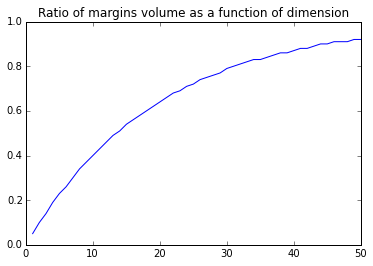

In [25]:
plt.plot(dimensions, margin_ratios)
plt.title('Ratio of margins volume as a function of dimension')

### Distance in Hyperspace

Another practical effect of high dimensionality is that the distance between _nearest neighbours_ becomes very large. One the observe this effect through a simple simulation.

Consider a $d$-dimensional _random vector_:

$${\bf x} = [x_1 ~~ x_2 ~~ \cdots ~~ x_d]^T$$

where each component $x_i$ is uniformly distributed between $-1$ and $1$, i.e., $x_i \sim U(-1,1)$. The following figure shows the such vectors $R^3$:

<img src="imgs/uniform_points_cube.gif" width=300/>

We can now measure the distance, $r$, of each point from the origin, and plot a histogram. From this histogram, we can see that the random points can be as close as possible to the origin.

<img src="imgs/distance_3d_hist.gif" width=350/>

As the dimensionality increases, the _smallest_ distance increases. In other words, the closest point to the origin can be very far away. The following two histograms illustrate this effect.

<img src="imgs/distance_50d_hist.gif" width=400/>
<img src="imgs/distance_100d_hist.gif" width=400/>
<img src="imgs/distance_100000d_hist.gif" width=400/>

### Data Sparsity

When the dimensionality $d$ increases, the volume of the space increases so fast that the available data becomes sparse. Consider $N$ uniformly distributed data points  in $d$ dimensional space. If we construct a hypercube by covering $r$ fraction of range of each feature, then number of points captured by this hypercube is given by

$$n = N r^d$$

The following simulation illustrates this effect. In this simulation $1000$ points are generated and we're considering $20\%$ of the range of each feature. The small rectangle in $2d$ captures $3.1\%$ of the data points whereas the cube in $3d$ captures only $0.5\%$ of total data points.


<img src="imgs/sparcity_2d.png" width=300/>
<img src="imgs/sparcity_3d.png" width=300/>